Assignment 1 - Experiments with Machine Learning
Alice Chen
Georgia Pitic
Ryan Kim

# Path: deliverable.ipynb

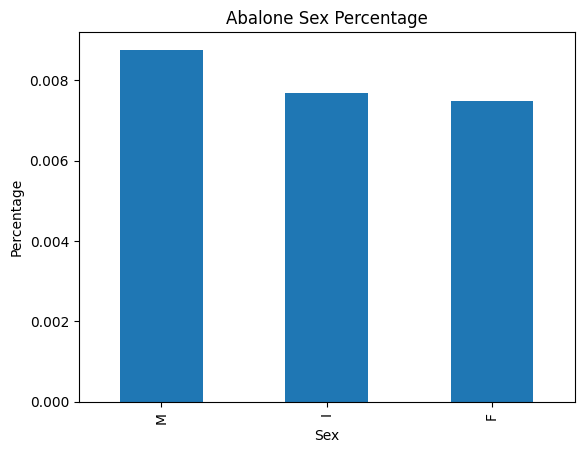

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load data
dataPenguins = pd.read_csv('penguins.csv')
dataAbalone = pd.read_csv('abalone.csv')

# 2 methods of convertion
# i. Convert dummy coded data
# dataPenguins = pd.get_dummies(dataPenguins, columns=['island', 'sex'])
# dataAbalone = pd.get_dummies(dataAbalone, columns=['Type'])  # doesn't work

# ii. Convert categorical data
dataPenguins['island'] = pd.Categorical(dataPenguins['island'])
dataPenguins['sex'] = pd.Categorical(dataPenguins['sex'])
dataAbalone['Type'] = pd.Categorical(dataAbalone['Type'])

# Plot percentage of instances in each output class
# dataPenguinsPercentage.plot(kind='bar')
# plt.title('Penguins Species Percentage')
# plt.xlabel('Species')
# plt.ylabel('Percentage')
# plt.savefig('penguinsPercentage.png')
# plt.show()

dataAbalonePercentage = (dataAbalone['Type'].value_counts(
    normalize=True) / len(dataAbalone)) * 100

dataAbalonePercentage.plot(kind='bar')
plt.title('Abalone Sex Percentage')
plt.xlabel('Sex')
plt.ylabel('Percentage')
plt.savefig('abalonePercentage.png')
plt.show()
